# ドルコスト平均法のデモ

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpf
import yfinance as yf
import pandas_ta as ta
from datetime import date, datetime, timedelta
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)

In [2]:
# 基本設定
# 代表的ETF: 上場インデックスファンドTOPIX(1308), iFreeETF 日経225(1320)
# 代表的ETF: 上場インデックスファンド米国債券(1486), iFreeETF 東証REIT(1488)
# 代表的ETF: NextFunds NYダウ(1546), NextFundsインド株(1678)
ticker = '1678.T'
start_date = '2017-01-01'
end_date = '2024-10-01'
interval = '3ME'
amount = 30000
# 株価データのダウンロード
data = yf.download(ticker, start=start_date, end=end_date)
data = data.dropna()
# 3ヶ月にリサンプリング
resampled_data = data.resample(interval).first()

[*********************100%%**********************]  1 of 1 completed


In [3]:
resampled_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-31,126.0,128.0,126.0,126.0,124.017113,261700
2017-04-30,128.0,130.0,128.0,130.0,127.954170,53600
2017-07-31,146.0,146.0,145.0,145.0,142.718109,56900
2017-10-31,154.0,156.0,154.0,155.0,152.560745,91900
2018-01-31,161.0,163.0,161.0,162.0,159.450577,190400


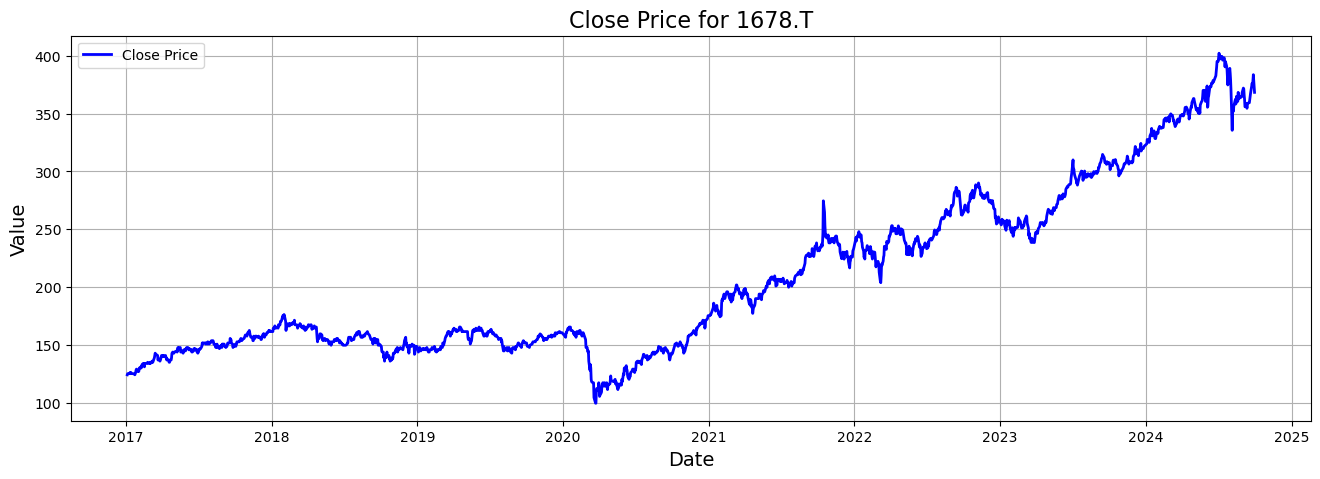

In [4]:
# 原資産の終値の図示
plt.figure(figsize=(16,5))
plt.plot(data['Adj Close'], color='b', linewidth=2, label='Close Price')
plt.title(f'Close Price for {ticker}', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [5]:
# ドルコスト平均法の計算
total_investment = 0
total_shares = 0
dca_log = []
for date, row in resampled_data.iterrows():
    price = row['Adj Close']
    total_shares += amount / price
    total_investment += amount
    dca_log.append({
        'Date': date,
        'Price': price,
        'Total Shares': total_shares,
        'Total Investment': total_investment,
        'Portfolio Value': total_shares * price
    })
dca_df = pd.DataFrame(dca_log)

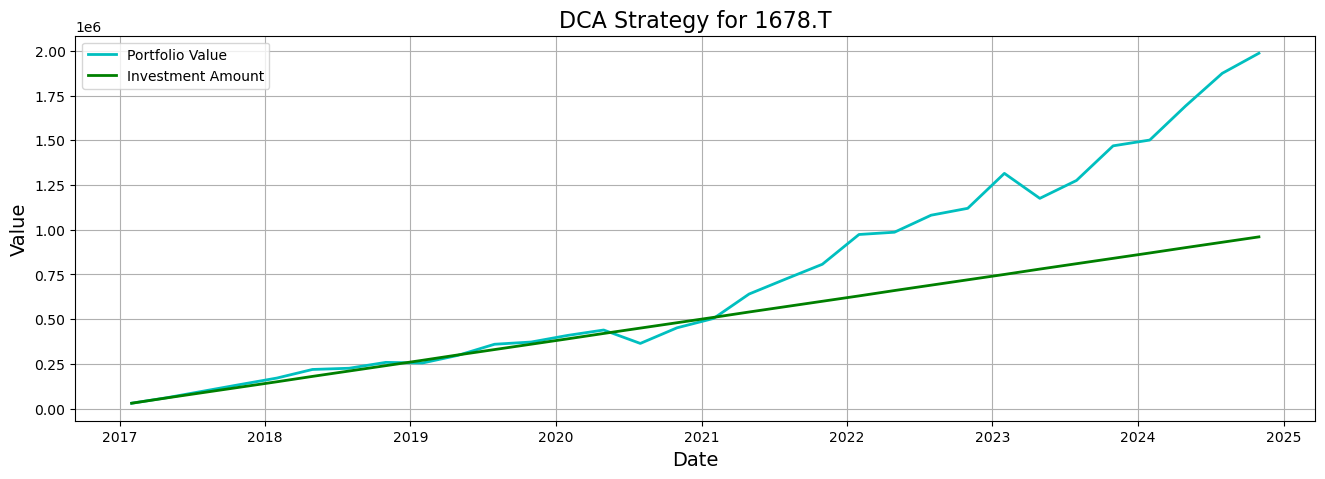

In [6]:
# 累積投資額とポートフォリオ価値の図示
plt.figure(figsize=(16,5))
plt.plot(dca_df['Date'], dca_df['Portfolio Value'], color='c', linewidth=2, label='Portfolio Value')
plt.plot(dca_df['Date'], dca_df['Total Investment'], color='g', linewidth=2, label='Investment Amount')
plt.title(f'DCA Strategy for {ticker}', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

In [7]:
dca_df['pct_profit'] = (dca_df['Portfolio Value']-dca_df['Total Investment'])/dca_df['Total Investment']
annual_profit = dca_df[dca_df['Date'].dt.month < 4]
annual_profit.loc[:,'pct_profit'] = annual_profit['pct_profit'].apply(lambda x: '{:.2%}'.format(x))
annual_profit

,Date,Price,Total Shares,Total Investment,Portfolio Value,pct_profit
0,2017-01-31,124.017113,241.902100,30000,3.000000e+04,0.00%
4,2018-01-31,159.450577,1071.354682,150000,1.708281e+05,13.89%
8,2019-01-31,138.781052,1836.443942,270000,2.548636e+05,-5.61%
12,2020-01-31,156.497787,2615.317695,390000,4.092914e+05,4.95%
16,2021-01-31,144.686630,3483.968281,510000,5.040836e+05,-1.16%
20,2022-01-31,238.191605,4086.321854,630000,9.733276e+05,54.50%
24,2023-01-31,288.487427,4558.163668,750000,1.314973e+06,75.33%
28,2024-01-31,300.889160,4989.802598,870000,1.501378e+06,72.57%
